# **Machine Learning Challenge**

Group 10

# Data Preparation ✅

In [1]:
COLAB = False

if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    !ls
    %cd /content/drive/My Drive/Colab Notebooks/ML
else:
    ! wget https://drive.google.com/file/d/1yKfritPUdfilPVpFc5iBWJXcz2Bizzu6/view?usp=share_link

Mounted at /content/drive
drive  sample_data
/content/drive/My Drive/Colab Notebooks/ML


In [2]:
import itertools
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from re import X
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

! pip install scikeras
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint

! pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

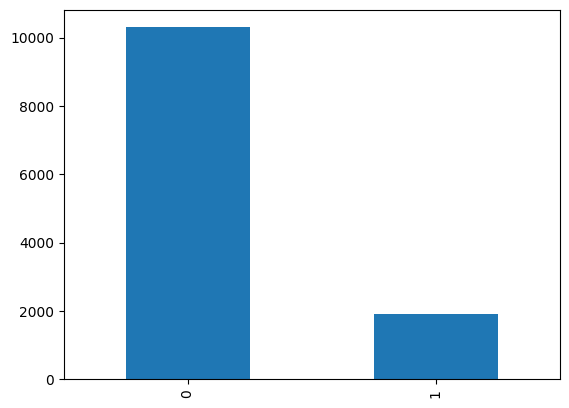

In [3]:
#data = pd.read_csv(join('data.csv'), header=0, index_col=0, parse_dates=True)
data = pd.read_csv('data.csv')

fig, ax = plt.subplots()
data['Transaction'].value_counts().plot(ax=ax, kind='bar')
#print(data.shape)

In [4]:
data.describe()

Transaction      SystemF1      SystemF2      SystemF3      SystemF4  \
count  12205.000000  12205.000000  12205.000000  12205.000000  12205.000000   
mean       0.156329      2.124211      2.357804      3.153298      4.073904   
std        0.363182      0.906823      1.710114      2.402340      4.016654   
min        0.000000      1.000000      1.000000      1.000000      1.000000   
25%        0.000000      2.000000      2.000000      1.000000      2.000000   
50%        0.000000      2.000000      2.000000      3.000000      2.000000   
75%        0.000000      3.000000      2.000000      4.000000      4.000000   
max        1.000000      8.000000     13.000000      9.000000     20.000000   

           SystemF5  Account_Page  Account_Page_Time     Info_Page  \
count  12205.000000  12205.000000       12205.000000  12205.000000   
mean       3.003687      2.338878          81.646331      0.508726   
std        1.409130      3.330436         177.491845      1.275617   
min        1.000000      0.000000           0.000000      0.000000   
25%        2.000000      0.000000           0.000000      0.000000   
50%        3.000000      1.000000           9.000000      0.000000   
75%        4.000000      4.000000          94.700000      0.000000   
max        5.000000     27.000000        3398.750000     24.000000   

       Info_Page_Time   ProductPage  ProductPage_Time         Month  \
count    12205.000000  12205.000000      12205.000000  12205.000000   
mean        34.825454     32.045637       1206.982457      7.394674   
std        141.424807     44.593649       1919.601400      3.622622   
min          0.000000      0.000000          0.000000      2.000000   
25%          0.000000      8.000000        193.000000      4.000000   
50%          0.000000     18.000000        608.942857      8.000000   
75%          0.000000     38.000000       1477.154762     11.000000   
max       2549.375000    705.000000      63973.522230     12.000000   

       SpecificHoliday  GoogleAnalytics_BR  GoogleAnalytics_ER  \
count     12205.000000        12205.000000        12205.000000   
mean          0.061942            0.020370            0.041466   
std           0.199666            0.045255            0.046163   
min           0.000000            0.000000            0.000000   
25%           0.000000            0.000000            0.014231   
50%           0.000000            0.002899            0.025000   
75%           0.000000            0.016667            0.048529   
max           1.000000            0.200000            0.200000   

       GoogleAnalytics_PV  Ad_Campaign_1  Ad_Campaign2  Ad_Campaign3  
count        12205.000000   12205.000000  12205.000000  12205.000000  
mean             5.949574       0.016796      0.016796      0.016796  
std             18.653671       0.128513      0.128513      0.128513  
min              0.000000       0.000000      0.000000      0.000000  
25%              0.000000       0.000000      0.000000      0.000000  
50%              0.000000       0.000000      0.000000      0.000000  
75%              0.000000       0.000000      0.000000      0.000000  
max            361.763742       1.000000      1.000000      1.000000

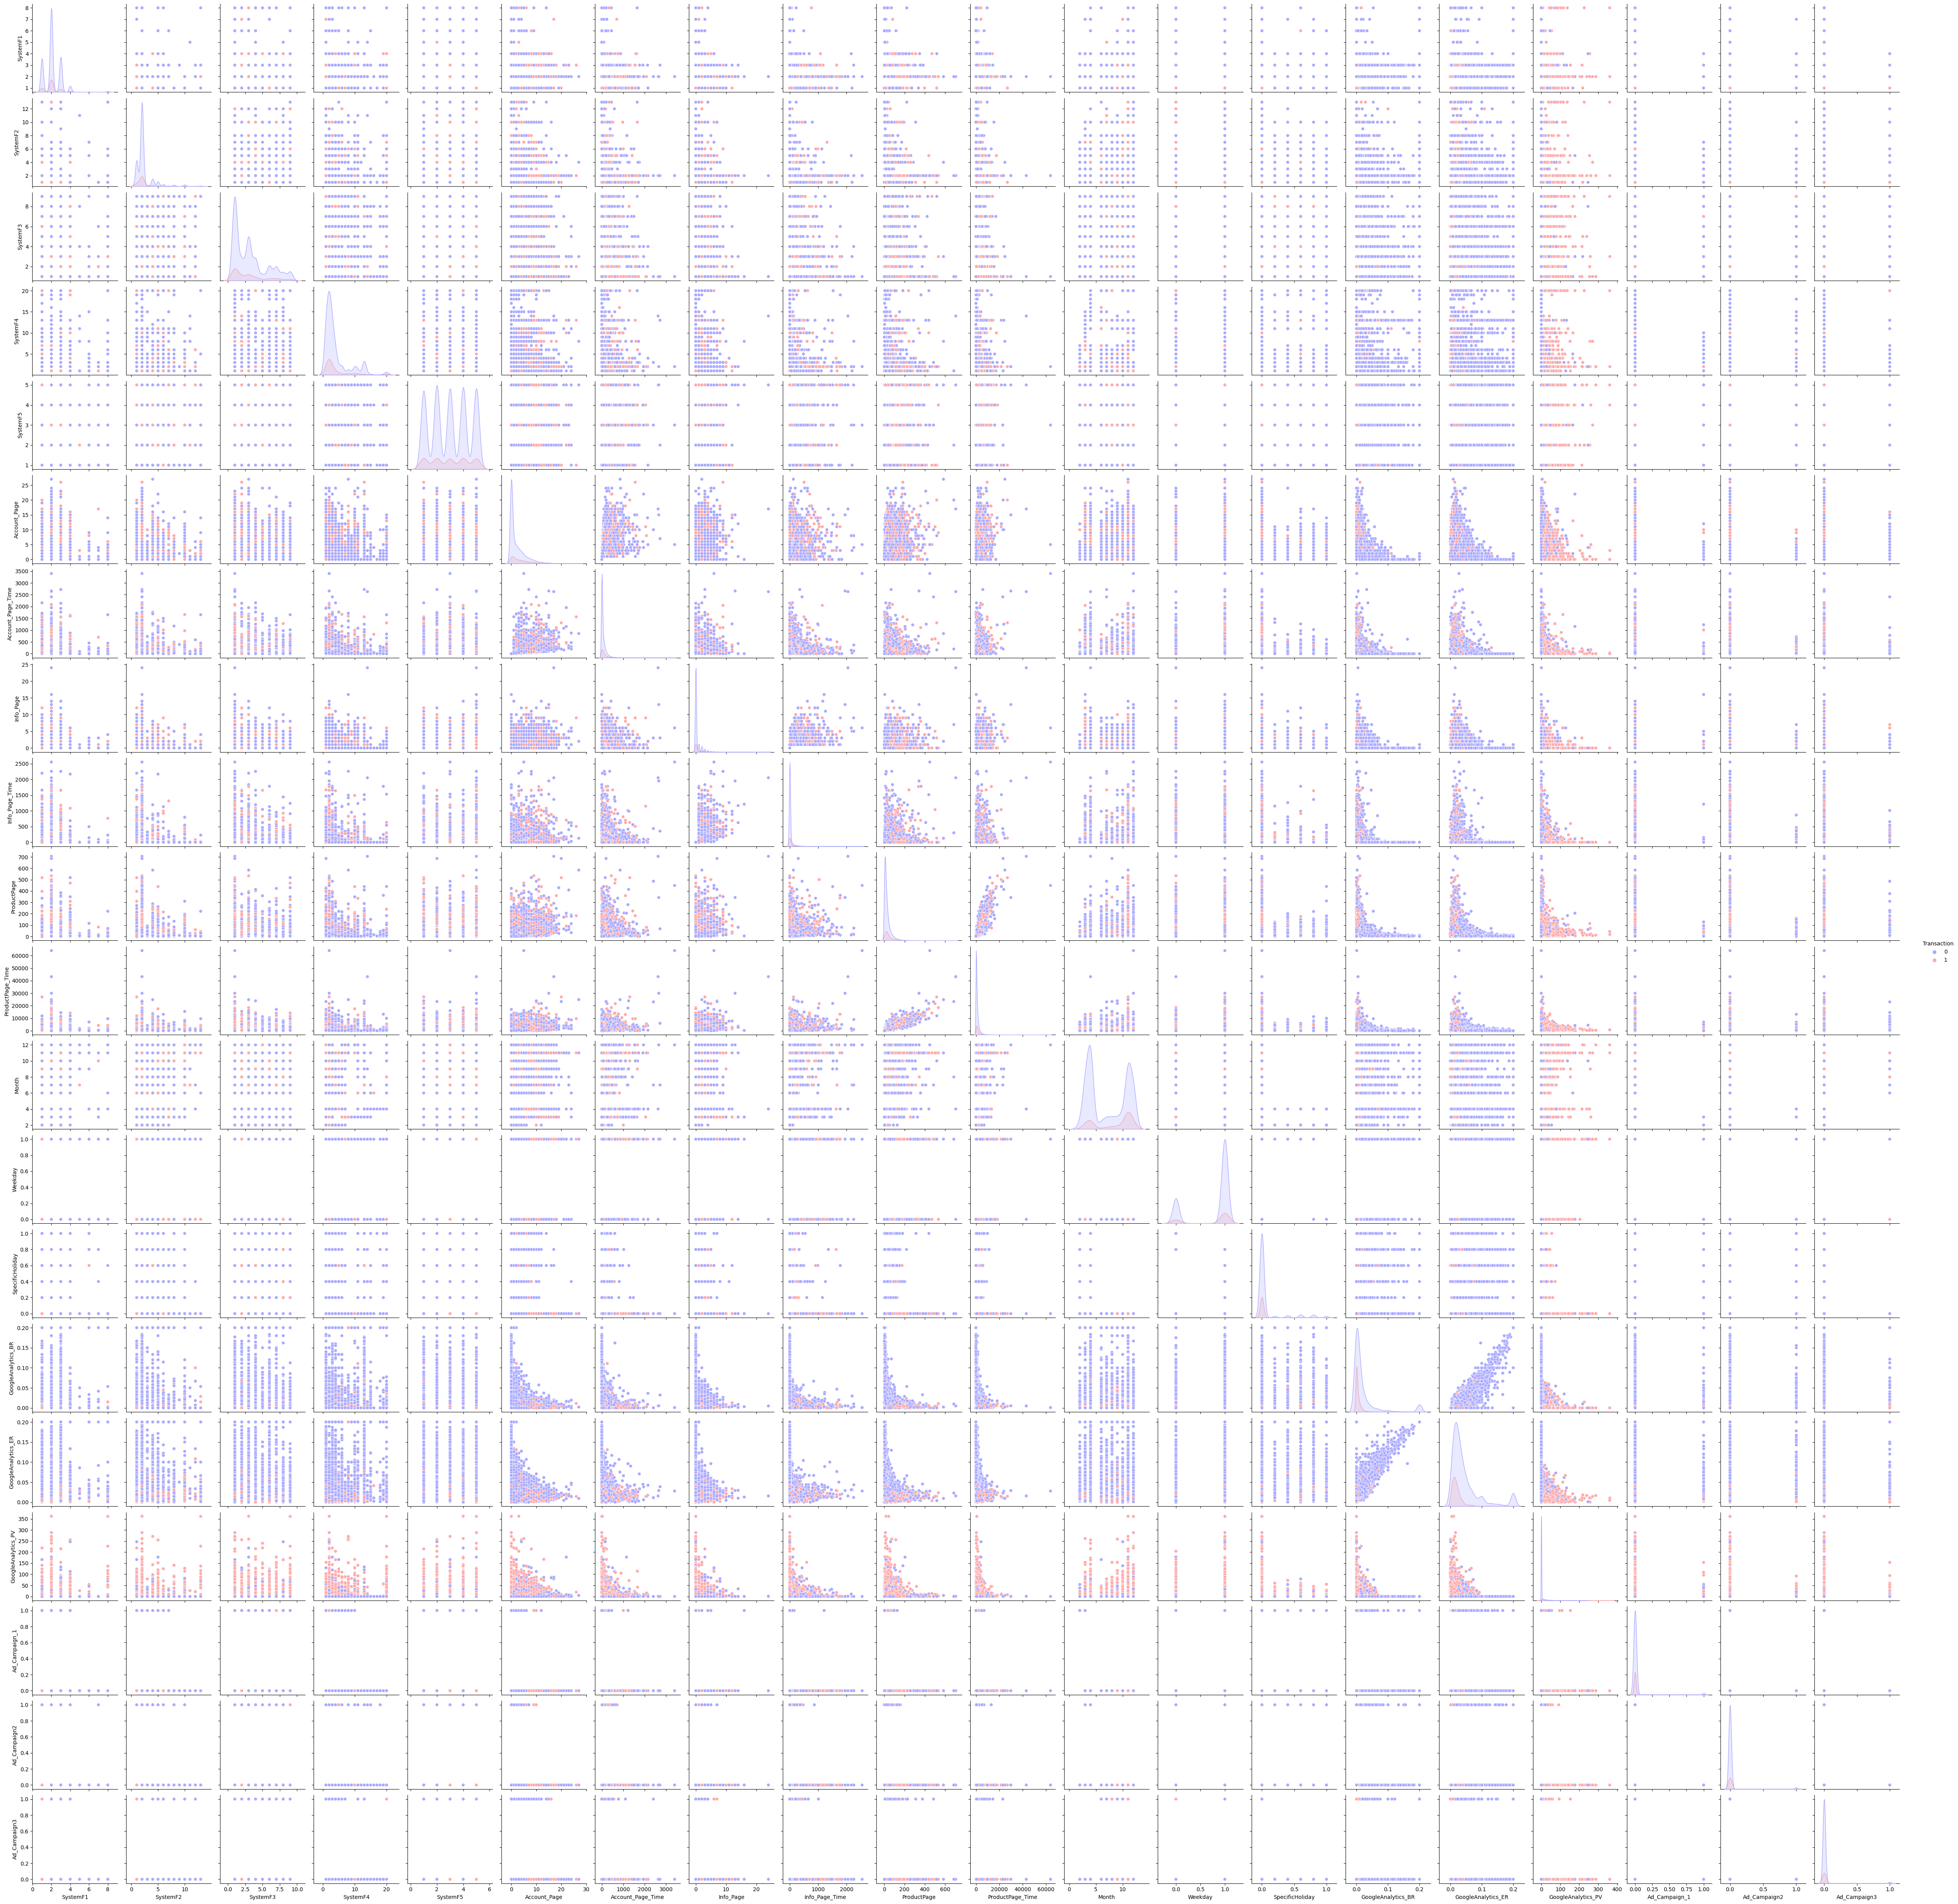

In [5]:
sns.pairplot(data,hue='Transaction',palette='bwr')

One-Hot Encoding and Split X-Y Data

In [6]:
encoder = OneHotEncoder()
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Customer_Type']]).toarray())
data = data.join(encoder_df)
data.drop('Customer_Type', axis = 1, inplace = True)
data = data.rename(columns = {0 : 'New_Customer', 1 : 'Other', 2 : 'Returning_Customer'})

column_names = list(data.columns.values)
column_names.pop(0)

# no shuffle on final data set for replicability
#data = data.sample(frac=1, random_state=1)
#data.head()

x_data = data.drop('Transaction',axis = 1).values
y_data = data['Transaction'].values

## Oversampling


In [7]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=1)
x_ros, y_ros= ros.fit_resample(x_data, y_data)

# Check the number of records after over sampling
#print('Raw dataset shape %s' % Counter(y_data))
#print('Oversampled dataset shape %s' % Counter(y_ros))

## Dimensionality reduction with PCA

In [8]:
# Scale the data first (normalizing)
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_ros)

# Perform PCA
pca = PCA(n_components=None)
pca.fit(x_data_scaled)

# Get the PCA's that explain at least 90% of the variance
explained_variances = pca.explained_variance_ratio_
total_variance = 0
n_components = 0

for explained_variance in explained_variances:
    total_variance += explained_variance
    n_components += 1

    if total_variance >= 0.9:
        break

pca = PCA(n_components=n_components)
x_data_pca = pca.fit_transform(x_data_scaled)


## Feature selection using mutual_info_classif

In [9]:
# RF = RandomForestClassifier(random_state=42)
# plt.plot(RF.feature_importances_, 'o')
# plt.xticks(range(x_train.shape[1]), x_train.columns, rotation=90)
# plt.ylim(0, 1)

In [10]:
mi_scores = mutual_info_classif(x_ros, y_ros.ravel(), random_state = 42)
K = 5  # Number of top features to select
high_score_features = []
selector = SelectKBest(mutual_info_classif, k=K)
selected_features = selector.fit_transform(x_ros, y_ros.ravel())
selected_feature_indices = selector.get_support(indices=True)
print('selected columns: ', data.columns[selected_feature_indices + 1])
x_data_fs = x_ros[:, selected_feature_indices]
# print(selected_feature_indices)

selected columns:  Index(['Account_Page_Time', 'ProductPage_Time', 'GoogleAnalytics_BR',
       'GoogleAnalytics_ER', 'GoogleAnalytics_PV'],
      dtype='object')


## Train-test split

In [11]:
# Full dataset with oversampling
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

# Dataset with feature selection
x_train_fs, x_test_fs, y_train, y_test = train_test_split(x_data_fs, y_ros, test_size=0.2, random_state=1)
x_train_fs, x_val_fs, y_train, y_val = train_test_split(x_train_fs, y_train, test_size=0.25, random_state=1)

# Dataset with PCA
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_data_pca, y_ros, test_size=0.2, random_state=1)
x_train_pca, x_val_pca, y_train, y_val = train_test_split(x_train_pca, y_train, test_size=0.25, random_state=1)

## Visualization


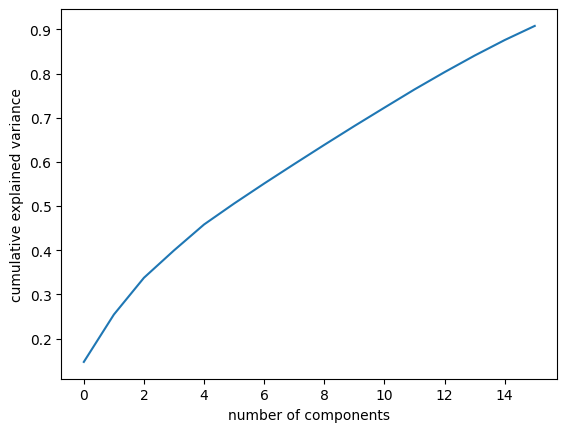

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

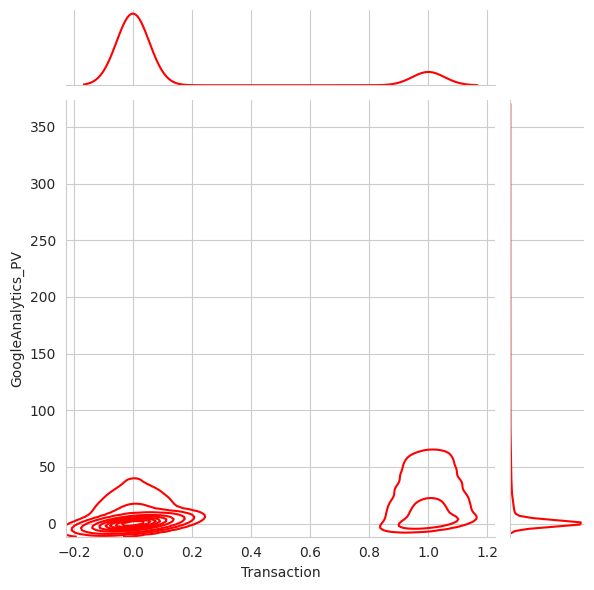

In [13]:
sns.set_style('whitegrid')
sns.jointplot(x='Transaction',y='GoogleAnalytics_PV',data=data,color='red',kind='kde')

# Random Forest ✅


In [ ]:
def RF(dataset):
    if dataset == 'fs':
        X_train = x_train_fs
        X_val = x_val_fs
        X_test = x_test_fs
    if dataset == 'pca':
        X_train = x_train_pca
        X_val = x_val_pca
        X_test = x_test_pca
    else:
        X_train = x_train
        X_val = x_val
        X_test = x_test

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    }

    # Create a random forest classifier
    rf = RandomForestClassifier(random_state=42)

    # Create a grid search object with cross validation (number of cross-validation folds cv=5)
    grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=0)

    # Fit the grid search object on the training data and use cross validation for evaluation
    grid_search.fit(X_train, y_train)

    # Access the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    class_report = classification_report(y_test, y_test_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # print(f'Best Parameters {data}:', best_params)
    # print('Validation Accuracy:', val_accuracy)
    # print('Test Accuracy:', test_accuracy, '\n')
    # print(classification_report(y_test, y_test_pred))
    # print(confusion_matrix(y_test, y_test_pred))

    info_dict = {
        'algorithm': 'RF',
        'dataset': f'{dataset}',
        'parameter': best_params,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'f1-score': class_report['macro avg']['f1-score'],
        'conf_matrix': conf_matrix
    }

    return info_dict

# Support Vector Machine ✅

In [ ]:
def SVM(dataset):
    if dataset == 'fs':
        X_train = x_train_fs
        X_val = x_val_fs
        X_test = x_test_fs
    if dataset == 'pca':
        X_train = x_train_pca
        X_val = x_val_pca
        X_test = x_test_pca
    else:
        X_train = x_train
        X_val = x_val
        X_test = x_test

    # param_grid = {
    #     'C': [0.1, 1, 10],
    #     'gamma': [0.01, 0.1, 1, 5],
    #     'kernel': ['rbf', 'sigmoid']
    # }

    param_grid = {
        'C': [1, 10],
        'gamma': [1, 5],
        'kernel': ['rbf']
    }

    # Create SVM classifier
    svm = SVC(random_state=42)

    # Create a grid search object with cross validation
    grid_search = GridSearchCV(svm, param_grid, cv=5, verbose=0)

    # Fit the grid search object on the training data and use cross validation for evaluation
    grid_search.fit(X_train, y_train)

    # Access the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    class_report = classification_report(y_test, y_test_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # print(f'Best Parameters {data}:', best_params)
    # print('Validation Accuracy:', val_accuracy)
    # print('Test Accuracy:', test_accuracy, '\n')
    # print(classification_report(y_test, y_test_pred))
    # print(confusion_matrix(y_test, y_test_pred))

    info_dict = {
        'algorithm': 'SVM',
        'dataset': f'{dataset}',
        'parameter': best_params,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'f1-score': class_report['macro avg']['f1-score'],
        'conf_matrix': conf_matrix
    }

    return info_dict

# KNN ✅

In [ ]:
def KNN(dataset):
    if dataset == 'fs':
        X_train = x_train_fs
        X_val = x_val_fs
        X_test = x_test_fs
    if dataset == 'pca':
        X_train = x_train_pca
        X_val = x_val_pca
        X_test = x_test_pca
    else:
        X_train = x_train
        X_val = x_val
        X_test = x_test

    k_range = list(range(1, 40))
    param_grid = dict(n_neighbors=k_range)

    # Create KNN classifier
    knn = KNeighborsClassifier()

    # Create a grid search object with cross validation
    grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=0)

    # Fit the grid search object on the training data and use cross validation for evaluation
    grid_search.fit(X_train, y_train)

    # Access the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    class_report = classification_report(y_test, y_test_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # print(f'Best Parameters {data}:', best_params)
    # print('Validation Accuracy:', val_accuracy)
    # print('Test Accuracy:', test_accuracy, '\n')
    # print(classification_report(y_test, y_test_pred))
    # print(confusion_matrix(y_test, y_test_pred))

    info_dict = {
        'algorithm': 'KNN',
        'dataset': f'{dataset}',
        'parameter': best_params,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'f1-score': class_report['macro avg']['f1-score'],
        'conf_matrix': conf_matrix
    }

    return info_dict

# Logistic Regression ✅


In [ ]:
# # built model using dataset with feature selection
# model = LogisticRegression()
# model.fit(x_train_fs,y_train)

# # prediction array
# prediction = model.predict(x_test_fs)

# # probability of each object
# probability = model.predict_proba(x_test_fs)

# # accuracy score
# # score = model.score(x_test_fs,y_test)

# #print('prediction: ', prediction)
# #print(probability)
# #print(score)

# # just to check
# #print(confusion_matrix(y_test, prediction))
# #print(accuracy_score(y_test, prediction))

# # Chris, I dont know how you changed below so i just left it there, heres the updated basic logistic regression model with accuracy=0.81

In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def LR(dataset):
    if dataset == 'fs':
        X_train = x_train_fs
        X_val = x_val_fs
        X_test = x_test_fs
    elif dataset == 'pca':
        X_train = x_train_pca
        X_val = x_val_pca
        X_test = x_test_pca
    else:
        X_train = x_train
        X_val = x_val
        X_test = x_test

    param_grid = {
    'C': [0.1, 0.5, 1],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'saga'],
    'max_iter': [10, 50, 100]
    }

    model = LogisticRegression()
    #model.fit(X_train,y_train)

    # Create a grid search object with cross validation (number of cross-validation folds cv=5)
    grid_search = GridSearchCV(model, param_grid, cv=5, verbose=0)

    # Fit the grid search object on the training data and use cross validation for evaluation
    grid_search.fit(X_train, y_train)

    # Access the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    class_report = classification_report(y_test, y_test_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # print(f'Best Parameters {data}:', best_params)
    # print('Validation Accuracy:', val_accuracy)
    # print('Test Accuracy:', test_accuracy, '\n')
    # print(classification_report(y_test, y_test_pred))
    # print(confusion_matrix(y_test, y_test_pred))

    info_dict = {
        'algorithm': 'LR',
        'dataset': f'{dataset}',
        'parameter': best_params,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'f1-score': class_report['macro avg']['f1-score'],
        'conf_matrix': conf_matrix
    }

    return info_dict

# Predictions

In [ ]:
@ignore_warnings(category=ConvergenceWarning)
def prediction():

    alg_dict = {
        'name': ['RF', 'SVM', 'KNN', 'LR'],
        'dataset': ['raw', 'fs', 'pca']
    }

    RF_scores = []
    RF_params = []
    SVM_scores = []
    SVM_params = []
    KNN_scores = []
    KNN_params = []
    LR_scores = []
    LR_params = []

    # Run all algorithms on all datasets and score them by: (validation accuracy + test accuracy) * macro average f1-score
    for i, n in enumerate(alg_dict['dataset']):
        info_dict_RF = RF(n)
        RF_params.insert(i, info_dict_RF['parameter'])
        score = (float(info_dict_RF['val_accuracy']) + float(info_dict_RF['test_accuracy'])) * float(info_dict_RF['f1-score'])
        RF_scores.insert(i , score)

        info_dict_SVM = SVM(n)
        SVM_params.insert(i, info_dict_SVM['parameter'])
        score = (float(info_dict_SVM['val_accuracy']) + float(info_dict_SVM['test_accuracy'])) * float(info_dict_SVM['f1-score'])
        SVM_scores.insert(i , score)

        info_dict_KNN = KNN(n)
        KNN_params.insert(i, info_dict_KNN['parameter'])
        score = (float(info_dict_KNN['val_accuracy']) + float(info_dict_KNN['test_accuracy'])) * float(info_dict_KNN['f1-score'])
        KNN_scores.insert(i , score)

        info_dict_LR = LR(n)
        LR_params.insert(i, info_dict_LR['parameter'])
        score = (float(info_dict_LR['val_accuracy']) + float(info_dict_LR['test_accuracy'])) * float(info_dict_LR['f1-score'])
        LR_scores.insert(i , score)

    # Determine which dataset performs the best and set dataset to predict
    datasets_scores = []
    for i, n in enumerate(RF_scores):
        score = n + SVM_scores[i] + KNN_scores[i] + LR_scores[i]
        datasets_scores.insert(i, score)
    best_dataset = datasets_scores.index(max(datasets_scores))

    print(f'{alg_dict["dataset"][best_dataset]} was chosen to be the best performing dataset with a score of: {max(datasets_scores)}')

    # Select correct datasets for best_dataset predictions
    if best_dataset == 0:
        x_finalpred = x_train
        x_finalpredtest = x_test
        colnames_final = column_names
    elif best_dataset == 1:
        x_finalpred = x_train_fs
        x_finalpredtest = x_test_fs
        colnames_final = column_names
        for i in selected_feature_indices:
            del colnames_final[i]
    elif best_dataset == 2:
        x_finalpred = x_train_pca
        x_finalpredtest = x_test_pca
        colnames_final = column_names[:n_components]
    else:
        print(f'Error while choosing best_dataset with value {best_dataset}')

    # run all algorithms on selected dataset with best parameters and write to full column (oversampled) .csv file
    for alg in alg_dict['name']:
        if alg == 'RF':
            params = RF_params[best_dataset]
            model = RandomForestClassifier(n_estimators = int(params["n_estimators"]),
                                           max_depth = int(params["max_depth"]),
                                           min_samples_split = int(params["min_samples_split"]),
                                           random_state=42)
        elif alg == 'SVM':
            params = SVM_params[best_dataset]
            model = SVC(C = float(params["C"]),
                        gamma = float(params["gamma"]),
                        kernel = params["kernel"],
                        random_state=42)
        elif alg == 'KNN':
            params = KNN_params[best_dataset]
            model = KNeighborsClassifier(n_neighbors = int(params["n_neighbors"]))

        elif alg == 'LR':
            params = LR_params[best_dataset]
            model = LogisticRegression(C = float(params["C"]),
                                       solver = params["solver"],
                                       max_iter = int(params["max_iter"]))

        model.fit(x_finalpred, y_train)
        pred = model.predict(x_finalpredtest)

        # Model Summary
        print(f'\n{alg} Summary:')
        print(f'Best Parameters {params}')
        print('Validation Accuracy:', accuracy_score(y_val, pred))
        print('Test Accuracy:', accuracy_score(y_test, pred), '\n')
        print(classification_report(y_test, pred))
        print("Confusion Matrix")
        print(confusion_matrix(y_test, pred))

        DF_pred = pd.DataFrame(pred, columns = ['Predicted Transaction'])
        DF_y = pd.DataFrame(y_test, columns = ['Transaction'])
        DF_x = pd.DataFrame(x_finalpredtest, columns = colnames_final)
        DF_full = pd.concat([DF_pred, DF_y, DF_x], axis='columns')
        DF_full.to_csv(f'{alg}-{alg_dict["dataset"][best_dataset]}-prediction.csv')

    print('\n Predictions successfully written to files.')

def main():
    prediction()

main()

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search alg

pca was chosen to be the best performing dataset with a score of: 6.583536442739548

RF Summary:
Best Parameters {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Validation Accuracy: 0.9094440398154892
Test Accuracy: 0.9094440398154892 

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2045
           1       0.91      0.92      0.91      2074

    accuracy                           0.91      4119
   macro avg       0.91      0.91      0.91      4119
weighted avg       0.91      0.91      0.91      4119

Confusion Matrix
[[1847  198]
 [ 175 1899]]

SVM Summary:
Best Parameters {'C': 10, 'gamma': 5, 'kernel': 'rbf'}
Validation Accuracy: 0.9737800436999272
Test Accuracy: 0.9737800436999272 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2045
           1       1.00      0.95      0.97      2074

    accuracy                           0.97      4119
   macro avg  